In [ ]:
#object detection from image

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
[1 2]


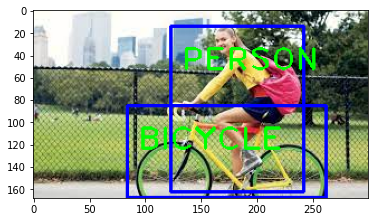

In [1]:
import cv2
import matplotlib.pyplot as plt
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    print(classLabels)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
img = cv2.imread('bic.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ClassIndex, confidence, box = model.detect(img,confThreshold=0.5)
print(ClassIndex)


font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf ,boxes in zip(ClassIndex.flatten(),confidence.flatten(),box):
    cv2.rectangle(img,boxes,color=(255,0,0),thickness=2)
    cv2.putText(img,classLabels[ClassInd-1].upper(),(boxes[0]+10,boxes[1]+40),font,2,(0,255,0),2)

    
    
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#object detection in a video

In [1]:
import cv2
import matplotlib.pyplot as plt
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    print(classLabels)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
cap=cv2.VideoCapture("traffic.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError("cant open video")
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidence,box=model.detect(frame,confThreshold=0.5)
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),box):
            cv2.rectangle(frame,boxes,color=(255,0,0),thickness=2)
            cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,2,(0,255,0),2)
    cv2.imshow('object detection tutorial',frame)
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
[6 6 6 3 3 1 1 1 3 1 3 3]
[6 6 6 3 3 1 1 3 3 1 1 1 3 8 3]
[6 6 6 3 3 1 1 3 3 8 3 3]
[6 6 6 3 3 1 3 4 3 1 3 1 1 1 3]
[6 6 6 3 3 1 1 3 4

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
